<a href="https://colab.research.google.com/github/paraskhulbe/Data_Science_Portfolio/blob/master/Company_insolvency_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's build an efficient classifier by addressing various in-depth technical complexities and business-level complexities(a workflow prototype)

> By Paras Khulbe 

Highlights -
- Dealing with the class-imbalance for biasing-complexity in a few algorithms
- Elimination of redundant features and optimization of number of features for storage and processing cost
- Accuracy paradox & a valid evaluation
- After deployment, continuous monitoring of the dependencies of ML for updating the reliability of prediction with the stakeholders in the absence of digitally available data

**Finally, it is about generalizing the relation within the limitations of the existing algorithms. With a more analysis on the mathematical side, we can efficiently evaluate the effectiveness of the model and can define their limitations.**



# Loading & Pre-processing of Data

In [ ]:
#Downloading the data from the server
!wget -cq https://www.dropbox.com/s/6xo8glwqozmpesr/company_insolvency_data.csv 

In [ ]:
#For data analytics
import pandas as pd

#For formatting the output
!pip install colorama
from colorama import Fore, Back, Style

In [ ]:
#Loading & overviewing the data 
df = pd.read_csv('company_insolvency_data.csv')
df.info()
print(Fore.GREEN+"\nThe size of dataset(rows,columns) : " + str(df.shape)+"\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**The data is in qualified state to be entered into the main process** (assuming it is supplied as a fully cleaned data)

# Engineering the ML model

- Feature engineering & bias detectedion (should also be guided by subject matter expert)

- Training & evaluation of various Binary classification models
- Selection and evaluation of model with the best performance

## Feature engineering and bias detection

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,...,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599
1,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220


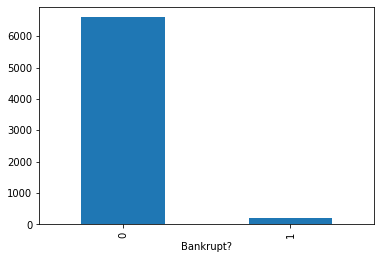

In [ ]:
#checking for class imbalance
df.groupby('Bankrupt?').count().iloc[:,1].plot.bar() 
df.groupby('Bankrupt?').count()

**Dataset is showing a very high imbalance!**







---


- Need to fix class-imbalance for the algorithms that are sensiive to it: we will use RandomOverSampler
- Requirement of Dimensionality reduction to the reasonable size: we will use PCA



---






## Training & evaluation of various Binary classification models

In [ ]:
#For extracting small fraction for testing
from sklearn.model_selection import train_test_split as tts

#For dimensionality reduction & class imbalance
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler


#For building & analyzing various classifier prediction
from imblearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
#Partitioning of the data
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'],axis=1)
X_train, X_test, y_train, y_test = tts(X, y, stratify=df['Bankrupt?'], random_state=888) # stratified extraction for imbalanced class.

#Input for dimesnion-reduction and bias removal
pca = PCA(n_components=95) #lower diimension is not working
ros = RandomOverSampler(random_state=0)

#pipeline configuration for various models
clf_knn = Pipeline([('pca', pca), ('ros', ros), ('classifier', KNN())])
clf_svm = Pipeline([('pca', pca), ('ros', ros), ('classifier',svm.SVC())])
clf_tree = Pipeline([('pca',pca),('ros', ros), ('classifier',tree.DecisionTreeClassifier())])
clf_NB = Pipeline([('pca', pca), ('ros', ros), ('classifier',GaussianNB())])
clf_lg = Pipeline([('pca', pca), ('ros', ros), ('classifier',LogisticRegression(solver='liblinear'))])

In [ ]:
#training and evaluation of various models
for name,clf in [('KNN Classifier',clf_knn),('SVM Classifier',clf_svm),('Decision Tree',clf_tree),('Naive Bayes',clf_NB),('Logistic Regression Classifier',clf_lg)]:
  print("\n\n"+Fore.GREEN+name)
  print(Style.RESET_ALL)
  clf.fit(X_train, y_train) 
  y_hat = clf.predict(X_test)
  print(classification_report(y_test, y_hat,target_names=['Not Bankrupt','Bankrupt']))



KNN Classifier

              precision    recall  f1-score   support

Not Bankrupt       0.97      0.93      0.95      1650
    Bankrupt       0.10      0.22      0.13        55

    accuracy                           0.91      1705
   macro avg       0.53      0.58      0.54      1705
weighted avg       0.94      0.91      0.93      1705



SVM Classifier

              precision    recall  f1-score   support

Not Bankrupt       0.98      0.78      0.87      1650
    Bankrupt       0.06      0.42      0.11        55

    accuracy                           0.77      1705
   macro avg       0.52      0.60      0.49      1705
weighted avg       0.95      0.77      0.84      1705



Decision Tree

              precision    recall  f1-score   support

Not Bankrupt       0.97      0.97      0.97      1650
    Bankrupt       0.21      0.25      0.23        55

    accuracy                           0.94      1705
   macro avg       0.59      0.61      0.60      1705
weighted avg       0.

## Selection and evaluation of model with the best performance

**As we can see that, decision tree is performing in top in every aspect. Mainly for the highest low-precison for the under-represented class. The classifier is able to predict 1 in the 5 bankrupt companies correctly at the cost of prediciting 1 in 50 non-bankrupt companies incorrectly.**



---



This can be a worth performance, subjected to be discussed with the stake holders otherwise if more precision is required(for predicting the insolvency of the company), the more data/ or more distinguished features will be required.

In [ ]:
# save the model to disk for external use
import joblib

filename = 'model.sav'
joblib.dump(clf_tree, filename)

!ls

company_insolvency_data.csv  model.sav	sample_data


# Integrating the ML model with API for deployment
(for independent service functionality under microservice architecture)

In [ ]:
#A basic protoype of API with REST standards
#using flask object
#!pip install flask 
"""

import flask
import joblib
from sklearn import tree

#API object instantiation
app = flask.Flask(__name__)
app.config["DEBUG"] = True

#mapping the incoming request(with the data) with the following function
@app.route('/predict/', methods=['POST'])
def predict():
  features = flask.request.get_json()
  clf = joblib.load('model')
  return(clf.predict(features))



#run the object at some address(URL)
app.run(host='0.0.0.0', port= 8090)
 
"""

# You can comment and view the notebook here - [click](https://colab.research.google.com/drive/1xBJYKJryCQKCIvxeAT4FquJI5DoWNN6a?usp=sharing)